In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Any

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1. Developing functions

In [2]:
# python function for implementation of gradient descent (GD) with momentum algorithm
def gradient_descent_momentum(
        f: Any,
        df: Any,
        initial_position: List[float],
        learning_rate: float = 0.1,
        momentum: float = 0.9,
        epsilon: float = 1e-6,
        max_iterations: int = 1000
    ) -> List[float]:

    position = np.array(initial_position)
    velocity = np.zeros_like(position)

    for _ in range(max_iterations):
        gradient = df(*position)
        velocity = momentum * velocity - learning_rate * gradient
        position += velocity
        
        if np.linalg.norm(gradient) < epsilon:
            break

    return position

# python function for implementation of ADAM optimization algorithm
def adam_optimizer(
        f: Any,
        df: Any,
        initial_position: List[float],
        learning_rate: float = 0.001,
        beta1: float = 0.9,
        beta2: float = 0.999,
        epsilon: float = 1e-8,
        max_iterations: int = 1000
    ) -> List[float]:

    position = np.array(initial_position)
    m = np.zeros_like(position)
    v = np.zeros_like(position)
    t = 0

    for _ in range(max_iterations):
        t += 1
        gradient = df(*position)

        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)

        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)

        position -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

    return position

## 2. Target function

In [3]:
# target function 
def f(x: float, y: float) -> float:
    return x ** 2 + y ** 2 + x * y

# derivative with respect to variable x
def df_dx(x: float, y: float) -> float:
    return 2 * x + y

# derivative with respect to variable y
def df_dy(x: float, y: float) -> float:
    return 2 * y + x

### Plot of function

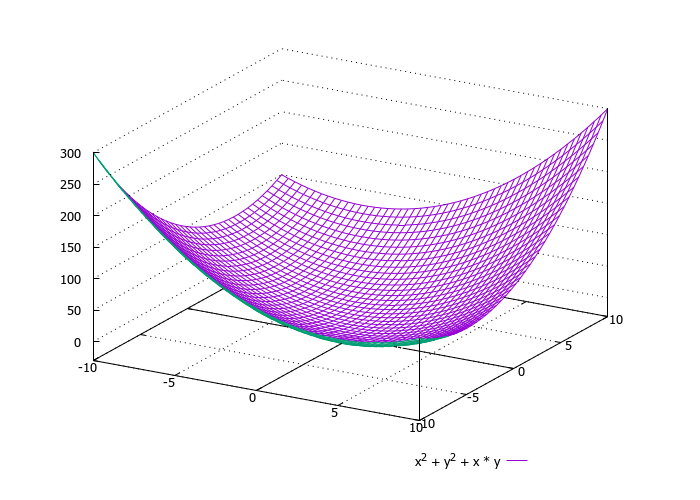

#### Some changes with "Developing functions" in order to come up with 3 task

In [4]:
def gradient_descent_momentum(
        f: Any,
        x_curr: float,
        y_curr: float,
        df_dx: Any,
        df_dy: Any,
        momentum: float = 0.9,
        learning_rate: float = 0.01,
        tol: float = 0.001,
        max_iterations: int = 1000
    ) -> Any:

    history = []
    change_x = np.random.random()
    change_y = np.random.random()

    for i in range(max_iterations):
        gradient_x = df_dx(x_curr, y_curr)
        gradient_y = df_dy(x_curr, y_curr)

        change_x = momentum * change_x + (1 - momentum) * gradient_x
        change_y = momentum * change_y + (1 - momentum) * gradient_y

        x_curr -= learning_rate * change_x
        y_curr -= learning_rate * change_y

        # Add function value
        current_value = f(x_curr, y_curr)
        history.append(current_value)

        # Check for convergence
        if i >= 1 and abs(history[-1] - history[-2]) < tol:
            break

    return history

def adam_optimizer(
        f: Any,
        x_curr: float,
        y_curr: float,
        df_dx: Any,
        df_dy: Any,
        learning_rate: float = 0.01,
        beta1: float = 0.9,
        beta2: float = 0.999,
        epsilon: float = 1e-8,
        tol: float = 0.001,
        max_iterations: int = 1000
    ) -> Any:

    m_x, m_y = 0, 0
    v_x, v_y = 0, 0
    t = 0

    history = []

    for i in range(max_iterations):
        t += 1
        gradient_x = df_dx(x_curr, y_curr)
        gradient_y = df_dy(x_curr, y_curr)

        m_x = beta1 * m_x + (1 - beta1) * gradient_x
        m_y = beta1 * m_y + (1 - beta1) * gradient_y

        v_x = beta2 * v_x + (1 - beta2) * gradient_x**2
        v_y = beta2 * v_y + (1 - beta2) * gradient_y**2

        m_x_hat = m_x / (1 - beta1**t)
        m_y_hat = m_y / (1 - beta1**t)

        v_x_hat = v_x / (1 - beta2**t)
        v_y_hat = v_y / (1 - beta2**t)

        change_x = learning_rate * m_x_hat / (v_x_hat**0.5 + epsilon)
        change_y = learning_rate * m_y_hat / (v_y_hat**0.5 + epsilon)

        x_curr -= change_x
        y_curr -= change_y

        # Add function value
        current_value = f(x_curr, y_curr)
        history.append(current_value)

        # Check for convergence
        if i >= 1 and abs(history[-1] - history[-2]) < tol:
            break

    return history

## 3. Illustration of finding an extremum

### Test gradient descent (GD) with momentum algorithm

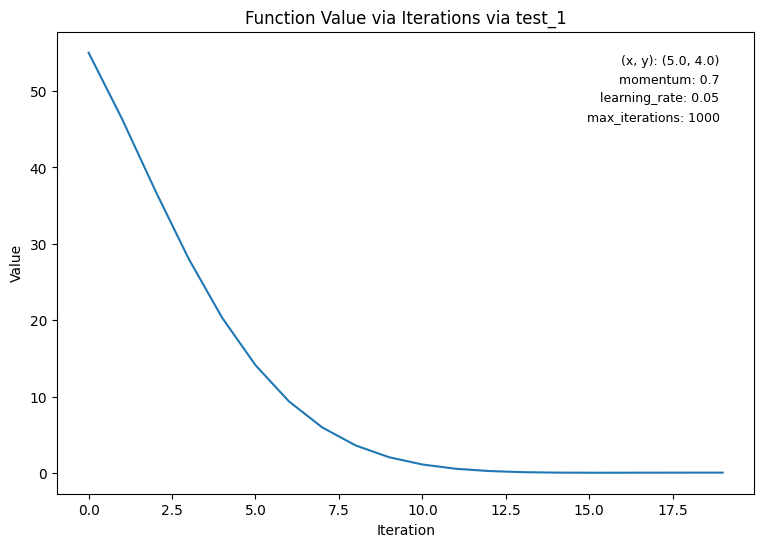

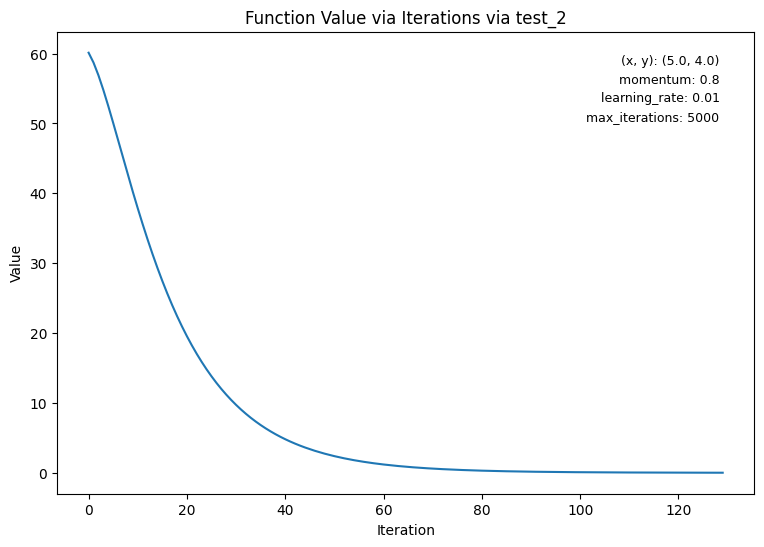

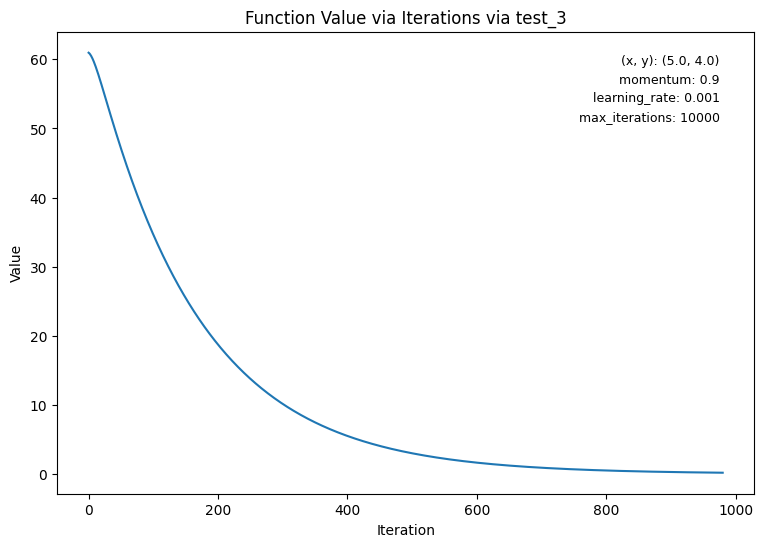

In [5]:
initial_position = [5.0, 4.0]
tests = {
    'test_1': [0.7, 0.05, 0.001, 1000],
    'test_2': [0.8, 0.01, 0.001, 5000],
    'test_3': [0.9, 0.001, 0.001, 10000]
}

for temp_test in tests:
    temp_momentum = tests[temp_test][0]
    temp_learning_rate = tests[temp_test][1]
    temp_tol = tests[temp_test][2]
    temp_max_iterations = tests[temp_test][3]
    history = gradient_descent_momentum(
        f=f,
        x_curr=initial_position[0],
        y_curr=initial_position[1],
        df_dx=df_dx,
        df_dy=df_dy,
        momentum=temp_momentum,
        learning_rate=temp_learning_rate,
        tol=temp_tol,
        max_iterations=temp_max_iterations
    )

    # Plot Function Values
    text_height = 0.95
    text_height_delta = 0.04
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(1, 1, 1)
    sns.lineplot(history, ax=ax)
    ax.text(0.95, text_height - 0 * text_height_delta, f"(x, y): ({initial_position[0]}, {initial_position[1]})", transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=9)
    ax.text(0.95, text_height - 1 * text_height_delta, f"momentum: {temp_momentum}", transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=9)
    ax.text(0.95, text_height - 2 * text_height_delta, f"learning_rate: {temp_learning_rate}", transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=9)
    ax.text(0.95, text_height - 3 * text_height_delta, f"max_iterations: {temp_max_iterations}", transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=9)
    ax.set_title(f'Function Value via Iterations via {temp_test}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Value')

### Test ADAM optimization algorithm 

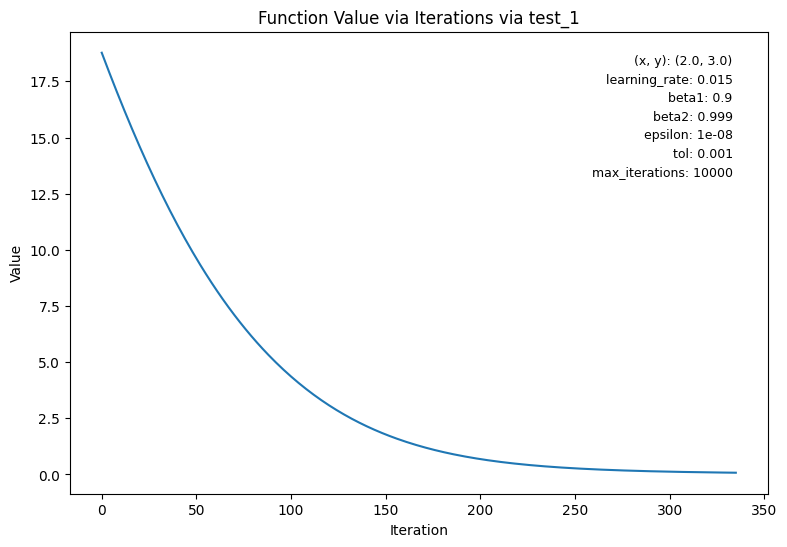

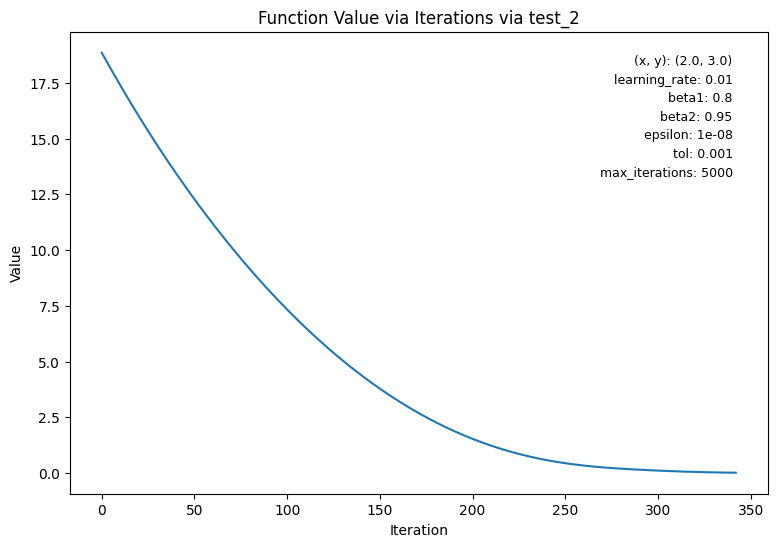

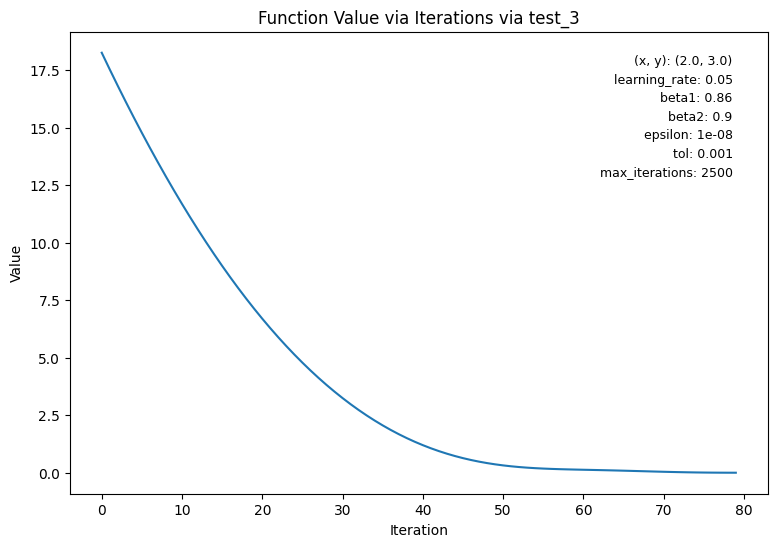

In [6]:
initial_position = [2.0, 3.0]
tests = {
    'test_1': [0.015, 0.9, 0.999, 1e-8, 0.001, 10000],
    'test_2': [0.01, 0.8, 0.95, 1e-8, 0.001, 5000],
    'test_3': [0.05, 0.86, 0.9, 1e-8, 0.001, 2500]
}

for temp_test in tests:
    temp_learning_rate = tests[temp_test][0]
    temp_beta1 = tests[temp_test][1]
    temp_beta2 = tests[temp_test][2]
    temp_epsilon = tests[temp_test][3]
    temp_tol = tests[temp_test][4]
    temp_max_iterations = tests[temp_test][5]
    history = adam_optimizer(
        f=f,
        x_curr=initial_position[0],
        y_curr=initial_position[1],
        df_dx=df_dx,
        df_dy=df_dy,
        learning_rate=temp_learning_rate,
        beta1=temp_beta1,
        beta2=temp_beta2,
        epsilon=temp_epsilon,
        tol=temp_tol,
        max_iterations=temp_max_iterations
    )

    # Plot Function Values
    text_height = 0.95
    text_height_delta = 0.04
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(1, 1, 1)
    sns.lineplot(history, ax=ax)
    ax.text(0.95, text_height - 0 * text_height_delta, f"(x, y): ({initial_position[0]}, {initial_position[1]})", transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=9)
    ax.text(0.95, text_height - 1 * text_height_delta, f"learning_rate: {temp_learning_rate}", transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=9)
    ax.text(0.95, text_height - 2 * text_height_delta, f"beta1: {temp_beta1}", transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=9)
    ax.text(0.95, text_height - 3 * text_height_delta, f"beta2: {temp_beta2}", transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=9)
    ax.text(0.95, text_height - 4 * text_height_delta, f"epsilon: {temp_epsilon}", transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=9)
    ax.text(0.95, text_height - 5 * text_height_delta, f"tol: {temp_tol}", transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=9)
    ax.text(0.95, text_height - 6 * text_height_delta, f"max_iterations: {temp_max_iterations}", transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', fontsize=9)
    ax.set_title(f'Function Value via Iterations via {temp_test}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Value')

## 4. Conclusion

Gradient Descent is a classic and widely used optimization method in machine learning. It updates model parameters based on the gradient of the loss function, moving in the opposite direction of the gradient. However, it may suffer from issues like vanishing or exploding gradients and can get stuck in local optima.

The Momentum algorithm is an extension of Gradient Descent that helps overcome some of the issues of traditional Gradient Descent. It introduces an additional parameter called momentum, which takes into account previous parameter updates. Momentum adds inertia to the updates, allowing for faster learning and overcoming local optima.

The ADAM optimization algorithm is a more advanced optimization method that combines the benefits of Gradient Descent and the Momentum algorithm. ADAM uses two variables to accumulate both the first and second moments of the gradients. This adaptive learning rate method adjusts the learning rate for each parameter individually, allowing for faster convergence and better handling of sparse gradients.

In summary, while Gradient Descent is a basic optimization method, Momentum and ADAM offer enhancements to address some of its limitations. Momentum adds inertia to the updates, while ADAM adapts the learning rate based on the gradient moments. Both algorithms can help improve the convergence speed and the ability to escape local optima in the optimization process.